# Regresion Polinomial

In [3]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importamos el dataset
# adaptar el directorio
dataset = pd.read_csv('/tmp/Position_Salaries.csv')
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
# Separamos las variables predictoras (Posicion y Salario)
X = dataset.iloc[:, 1:2].values
# Para la X lo hacemos asi para que quede una matriz y no un vector

# La variable objetivo es el Salario
y = dataset.iloc[:, 2].values

In [7]:
# No tenemos suficientes datos para separar en training y test
# asi que lo dejamos como esta
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling - No hace falta porq la mayoria de los metodos ya lo hacen
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [8]:
# Construimos un Modelo Lineal para comparar luego
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Modelo de Regresión Polinómico
# lo que vamos a hacer primero es crear una nueva matriz con un predictor (X) y su cuadrado
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [10]:
# Ahora hacemos un Modelo basado en el mismo metodo de Regresion Linear
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

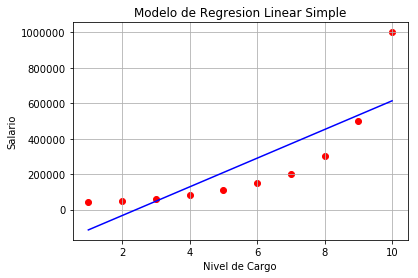

In [14]:
# Visualizacion de la Linear Regresion Simple
# primero los puntos de las observaciones reales (los salarios)
plt.scatter(X,y, color = 'red')
# luego los estimados de los mismos puntos pero con el modelo de regresion linear simple
plt.plot(X,lin_reg.predict(X), color='blue')
plt.title('Modelo de Regresion Linear Simple')
plt.ylabel('Salario')
plt.xlabel('Nivel de Cargo')
plt.grid(True)
plt.show()

In [15]:
# Predecimos algunos Salarios a ver como quedan
print(lin_reg.predict(10))
print(lin_reg.predict(7.5))

[ 613454.54545455]
[ 411257.57575758]


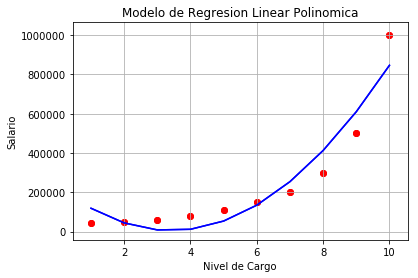

In [17]:
# Visualizacion de la Regresion Polinomial
# primero los puntos de las observaciones reales (los salarios)
plt.scatter(X,y, color = 'red')

# luego los estimados de los mismos puntos 
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Modelo de Regresion Linear Polinomica - grado 2')
plt.ylabel('Salario')
plt.xlabel('Nivel de Cargo')
plt.grid(True)
plt.show()

In [18]:
# Predicciones
print(lin_reg_2.predict(poly_reg.fit_transform(10)))
print(lin_reg_2.predict(poly_reg.fit_transform(7.5)))

[ 846636.36363636]
[ 328672.34848485]


In [19]:
# Creamos un modelo con grado 3
poly_reg3 = PolynomialFeatures(degree=3)
X_poly3 = poly_reg3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

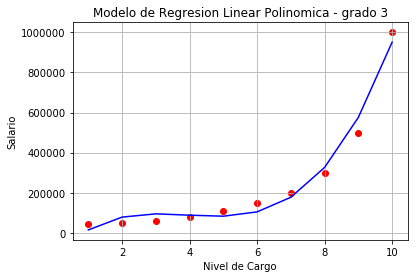

In [20]:
plt.scatter(X,y, color = 'red')
# luego los estimados de los mismos puntos 
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)), color='blue')
plt.title('Modelo de Regresion Linear Polinomica - grado 3')
plt.ylabel('Salario')
plt.xlabel('Nivel de Cargo')
plt.grid(True)
plt.show()



In [21]:
# Creamos un modelo con grado 4
poly_reg4 = PolynomialFeatures(degree=4)
X_poly4 = poly_reg4.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly4,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

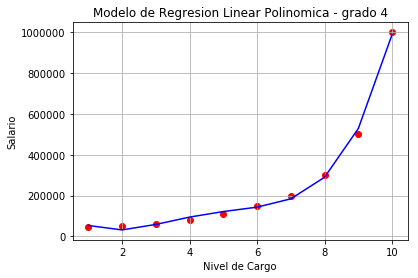

In [22]:
plt.scatter(X,y, color = 'red')
# luego los estimados de los mismos puntos 
plt.plot(X,lin_reg_4.predict(poly_reg4.fit_transform(X)), color='blue')
plt.title('Modelo de Regresion Linear Polinomica - grado 4')
plt.ylabel('Salario')
plt.xlabel('Nivel de Cargo')
plt.grid(True)
plt.show()

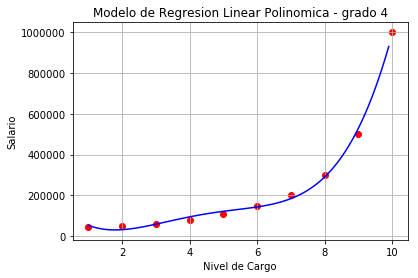

In [23]:
# Hacemos un cambio en la resolución del eje X para que quede mas smoothy

X_grid = np.arange(min(X), max(X), 0.1)
# Hacemos un reshape para que quede una matriz de N x 1
X_grid = X_grid.reshape((len(X_grid),1))

# Ahora solo hay que cambiar la X por X_grid
plt.scatter(X,y, color = 'red')
# luego los estimados de los mismos puntos pero con el modelo de regresion linear simple
plt.plot(X_grid,lin_reg_4.predict(poly_reg4.fit_transform(X_grid)), color='blue')
plt.title('Modelo de Regresion Linear Polinomica - grado 4')
plt.ylabel('Salario')
plt.xlabel('Nivel de Cargo')
plt.grid(True)
plt.show()